# Químicos en cosmeticos
### Autor: Augusto Musetti

La base de datos elegida para el trabajo se llama "Chemical in cosmetics", la misma fue creada por el departamento de salud del estado de California bajo el programa CSCP.  
El objetivo principal es almacenar informacion sobre los ingredientes peligrosos de los cosmeticos vendidos en california.
Para todos los productos vendidos en el estado se les solicita que reporten la incidencia de algún químico que este bajo sospecha de causar cancer u otras enfermedades.  
Esta base de datos tiene su inicio en 2007 y esta se actualizo por ultima vez en 2023. 

In [1]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


def apply_global_settings():
    plt.rc("axes", edgecolor="none")
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.left"] = False
    plt.rcParams["axes.spines.bottom"] = False
    sns.set_palette("deep")
    plt.rcParams["font.family"] = "Inter"
    plt.rcParams["font.size"] = 10


apply_global_settings()

Aqui se importan las librerias que se van a usar para la exploracion de los datos, el data cleaning y data analysis

| **NOMBRE DE LA COLUMNA**        | **TIPO DE DATO**  | **DEFINICIÓN**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| ---------------------- | ----------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| CDPHId                 | Texto plano | Número de identificación interno del producto del Departamento de Salud Pública de California (CDPH). Tenga en cuenta que el CDPHId puede aparecer más de una vez si un producto tiene más de un Color/Aroma/Sabor, más de una Categoría o más de un Nombre Químico/número CAS reportado.                                                                                                                                                                                                                                                                                                                                  |
| ProductName            | Texto plano | Nombre del producto tal como lo ingresó el fabricante, empacador y/o distribuidor. El nombre del producto se ingresa como texto libre en la base de datos de informes y puede contener errores ortográficos u otros errores.                                                                                                                                                                                                                                                                                                                                                                                               |
| CSFId                  | Texto plano | Número de identificación interno del CDPH para un color/aroma/sabor.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CSF                    | Texto plano | Color, aroma y/o sabor tal como lo ingresó el fabricante, empacador y/o distribuidor. El nombre del color/aroma/sabor se ingresa como texto libre en la base de datos de informes y puede contener errores ortográficos u otros errores. No todos los productos tienen colores, aromas o sabores específicos.                                                                                                                                                                                                                                                                                                              |
| CompanyId              | Texto plano | Número de identificación interno del CDPH para la empresa.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| CompanyName            | Texto plano | Nombre de la empresa tal como lo ingresó el fabricante, empacador y/o distribuidor. El nombre de la empresa se ingresa como texto libre en la base de datos de informes y puede contener errores ortográficos u otros errores.                                                                                                                                                                                                                                                                                                                                                                                             |
| BrandName              | Texto plano | Nombre de la marca tal como lo ingresó el fabricante, empacador y/o distribuidor. El nombre de la marca se ingresa como texto libre en la base de datos de informes y puede contener errores ortográficos u otros errores.                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrimaryCategoryId      | Texto plano | Número de identificación interno del CDPH para la categoría.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrimaryCategory        | Texto plano | Tipo de producto (13 categorías principales: Productos para bebés, Productos de baño, Fragancias, Productos para el cuidado del cabello (sin coloración), Productos para la coloración del cabello, Productos de maquillaje (no permanente), Productos para uñas, Productos de higiene bucal, Productos de cuidado personal, Productos para el afeitado, Productos para el cuidado de la piel, Productos relacionados con el sol, Tatuajes y maquillaje permanente). Consulte el archivo adjunto para las subcategorías dentro de cada categoría principal (Cosmetics-Chemicals-CA-CDPH-DataDictionary-Subcategories.csv). |
| SubCategoryId          | Texto plano | Número de identificación interno del CDPH para la subcategoría.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SubCategory            | Texto plano | Tipo de producto dentro de una de las 13 categorías principales. Consulte el archivo adjunto para las subcategorías dentro de cada categoría principal (Cosmetics-Chemicals-CA-CDPH-DataDictionary-Subcategories.xls).                                                                                                                                                                                                                                                                                                                                                                                                     |
| CASId                  | Texto plano | Número de identificación interno del CDPH para el químico.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| CasNumber              | Texto plano | Número de identificación química (número de registro del Servicio de Resúmenes Químicos asignado a un químico específico). Tenga en cuenta que diferentes formas de un químico pueden tener diferentes números CAS. Lo que aparece aquí es el número CAS seleccionado por el fabricante, empacador y/o distribuidor.                                                                                                                                                                                                                                                                                                       |
| ChemicalId             | Texto plano | Número de identificación interno del CDPH para el registro de este químico específico para este producto.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ChemicalName           | Texto plano | Nombre de la sustancia química en el producto cosmético. Tenga en cuenta que las sustancias químicas pueden tener más de un Nombre Químico. Lo que aparece aquí es el nombre químico seleccionado por el fabricante, empacador y/o distribuidor. La Ley de Cosméticos Seguros de California requiere que las empresas de cosméticos informen sobre productos que contengan ingredientes conocidos o sospechosos de causar cáncer o daño reproductivo o de desarrollo.                                                                                                                                                      |
| InitialDateReported    | Fecha       | Fecha en que el perfil del producto fue creado por el fabricante, empacador y/o distribuidor, es decir, la fecha en que el producto fue reportado por primera vez al CDPH.                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MostRecentDateReported | Fecha       | Fecha en que el perfil del producto fue modificado por última vez por el fabricante, empacador y/o distribuidor. El perfil del producto contiene toda la información sobre el producto con la excepción de la información química, que se almacena por separado. Este campo se predetermina al valor de InitialDateReported inicialmente.                                                                                                                                                                                                                                                                                  |
| DiscontinuedDate       | Fecha       | Si corresponde, fecha en que el producto fue descontinuado.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ChemicalCreatedAt      | Fecha       | La fecha en que este químico fue reportado por primera vez al CDPH para este producto.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ChemicalUpdatedAt      | Fecha       | Fecha en que este informe químico fue modificado por última vez por el fabricante, empacador y/o distribuidor. Este campo es único del perfil del producto. Este campo se predetermina al valor de ChemicalCreatedAt inicialmente.                                                                                                                                                                                                                                                                                                                                                                                         |
| ChemicalDateRemoved    | Fecha       | Si corresponde, fecha en que el químico fue eliminado del producto, es decir, reformulación.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| ChemicalCount          | Número      | Número total de químicos actuales reportados para este producto. Este número no incluye los químicos que han sido eliminados de un producto. Este número es un campo calculado basado en los informes actuales.                                                                                                                                                                                                                                                                                                                                                                                                            |

El dataset cuenta con una variable númerica entera positiva ("ChemicalCount"), 6 variables numéricas del tipo datetime y el resto se pueden clasificar como variables categoricas nominales.  
Tambien se puede apreciar que muchas de las variables heredaron su correspondiente Id de la base de datos original.
Según la fuente de la base de datos la clave primaria la componen "CDPHId", "CSFId", "ChemicalId" y "SubCategoryId".

# Analisis exploratorio

In [2]:
df_raw = pd.read_csv(
    "/home/augustom/Data_science_curso/chemicals-in-cosmetics-efaquy/chemicals-in-cosmetics.csv"
)
df_raw.info()
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


No se encontraron columnas sin valores no nulos. Pero se puede ver que los datatype de las fechas no son correctos

In [3]:
df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CDPHId,114635.0,20304.858987,12489.052554,2.0,8717.0,20895.0,31338.50,41524.0
CSFId,80662.0,32608.658377,19089.443910,1.0,15789.0,32541.0,48717.75,65009.0
CompanyId,114635.0,450.641532,409.533093,4.0,86.0,297.0,798.00,1391.0
PrimaryCategoryId,114635.0,51.076294,20.474341,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114635.0,66.819252,35.822097,3.0,48.0,52.0,65.00,172.0
CasId,114635.0,674.094107,149.214101,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114635.0,32837.556959,20439.412299,0.0,13990.0,32055.0,51578.50,68074.0
ChemicalCount,114635.0,1.288359,0.636418,0.0,1.0,1.0,1.00,9.0


Las columnas del tipo Id no se van a analizar en este cuadro.
La variable "ChemicalCount" parece tener valores outliers debido que, el valor maximo supera ampliamente la media reportada.

In [4]:
df_raw.describe(include="object").transpose()

,count,unique,top,freq
ProductName,114635,33716,Eyecolor,766
CSF,80237,34326,Black,247
CompanyName,114635,606,L'Oreal USA,5747
BrandName,114408,2713,SEPHORA,3394
PrimaryCategory,114635,13,Makeup Products (non-permanent),75827
SubCategory,114635,89,"Lip Color - Lipsticks, Liners, and Pencils",16555
CasNumber,108159,125,13463-67-7,93049
ChemicalName,114635,123,Titanium dioxide,93480
InitialDateReported,114635,2274,10/13/2009,2557
MostRecentDateReported,114635,2178,12/30/2010,18127


Se observa que existen valores nulos en las columnas CSF, BrandName, CasNumber, DiscontinuedDate y ChemicalDateRemoved.  

El químico predominante el dioxido de titanio por amplia diferencia. Esto se puede ver en la columna de CasNumber y ChemicalName.  

Las variables ProductName, CSF tiene alta cantidad de datos unicos.  

Las variables CompanyName, BrandName, PrimaryCategory, SubCategory poseen pocos datos unicos, los cuales se repiten.  

Esto tiene sentido debido que no van a existir mas companias y marcas que productos. Mientras que para las categorias se puede notar que a medida que aumenta la especifidad tambien aumenta el numero de categorias.  

En cuanto a las fechas se observa que el periodo 2009-2010 es el de mayor registro de productos.  
DiscontinuedDate presenta pocos valores no nulos, esto puede decir que son pocos los productos que salen del mercado.  

,ChemicalName,ChemicalId
0,Titanium dioxide,6
3,Titanium dioxide,7
4,Titanium dioxide,8
5,Titanium dioxide,9
6,Titanium dioxide,12178
...,...,...
114630,Titanium dioxide,68059
114631,Titanium dioxide,68060
114632,Titanium dioxide,68061
114633,Titanium dioxide,68062


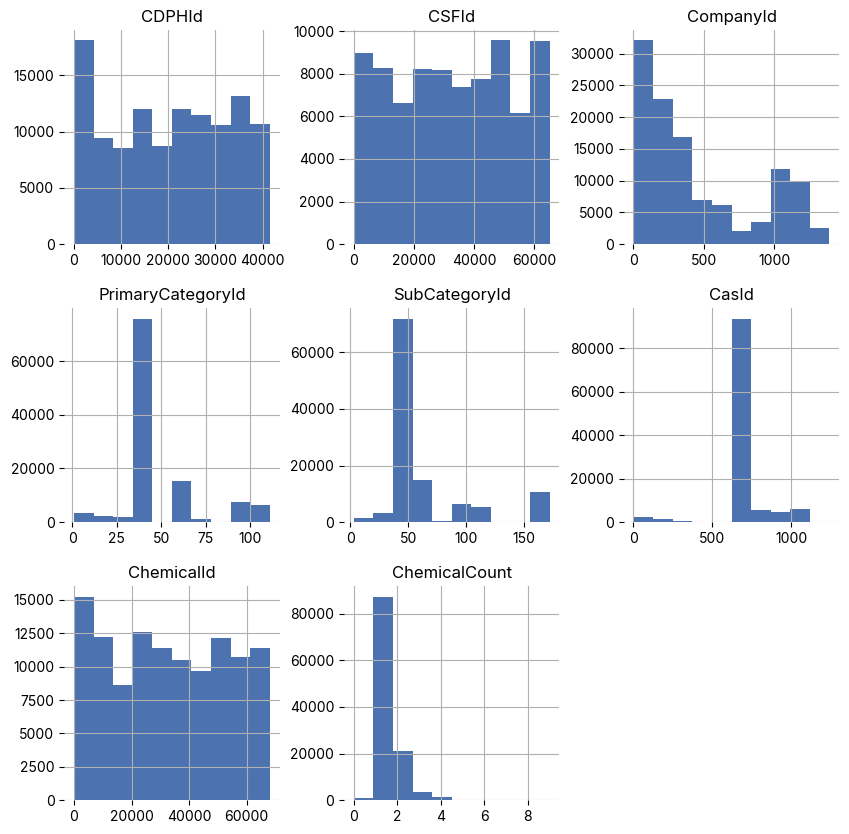

In [5]:
df_raw.hist(figsize=(10, 10))
df_raw[["ChemicalName", "ChemicalId"]][df_raw["ChemicalName"] == "Titanium dioxide"]

Los datos de los Id se condicen la descrición anterior de sus correspondientes variables categoricas con una excepcion: Los chemical Id no coinciden con el ChemicalName, ni con los CASId.  
Esto se ve en el histograma de los ID y se confirma con una query simple.   
Tomo la desicion de considerar los ChemicalID equivocados, ya que para cada chemicalname existen varios chemicalID

# Data Cleaning

In [6]:
df_raw.duplicated().sum()
df_raw.drop_duplicates(inplace=True)

Elimino las filas duplicadas

In [7]:
df_raw.head()


def remove_non_ascii(text):
    return re.sub(r"[^\x00-\x7F]+", "", text)


df_raw["ProductName"] = df_raw["ProductName"].apply(remove_non_ascii)
df_raw["CompanyName"] = df_raw["CompanyName"].apply(remove_non_ascii)
df_raw["BrandName"] = df_raw["BrandName"].astype(str)
df_raw["BrandName"] = df_raw["BrandName"].apply(remove_non_ascii)
df_raw

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


Se eliminan los caracteres no ascii dentro de las columnas que fueron rellenadas a mano (ProductName,CompanyName,BrandName)

In [8]:
print(df_raw.shape)
df_raw.drop_duplicates(
    subset=["CDPHId", "CSFId", "ChemicalName", "SubCategoryId"], inplace=True
)
print(df_raw.shape)

(114381, 22)
(105138, 22)


Elimino los duplicados de las celdas que conforman la clave primaria.

In [9]:
df_clean = df_raw.drop(
    [
        "CDPHId",
        "CSFId",
        "CompanyId",
        "PrimaryCategoryId",
        "ChemicalId",
        "SubCategoryId",
        "CasId",
        "CasNumber",
    ],
    axis=1,
)

Elimino las columnas con Id, ya que no aportan informacion adicional.  
El número CAS es un identificador de especies químicas, el mismo puede ser reemplazado por la columna ChemicalName

In [10]:
def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    return df


convert_to_datetime(
    df_clean,
    [
        "InitialDateReported",
        "MostRecentDateReported",
        "DiscontinuedDate",
        "ChemicalCreatedAt",
        "ChemicalUpdatedAt",
        "ChemicalDateRemoved",
    ],
)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105138 entries, 0 to 114634
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductName             105138 non-null  object        
 1   CSF                     71770 non-null   object        
 2   CompanyName             105138 non-null  object        
 3   BrandName               105138 non-null  object        
 4   PrimaryCategory         105138 non-null  object        
 5   SubCategory             105138 non-null  object        
 6   ChemicalName            105138 non-null  object        
 7   InitialDateReported     105138 non-null  datetime64[ns]
 8   MostRecentDateReported  105138 non-null  datetime64[ns]
 9   DiscontinuedDate        12102 non-null   datetime64[ns]
 10  ChemicalCreatedAt       105138 non-null  datetime64[ns]
 11  ChemicalUpdatedAt       105138 non-null  datetime64[ns]
 12  ChemicalDateRemoved     2565 non-nu

Como se menciono en la exploracion inicial los datos de tipo fecha no estaban en el formato correcto, asi que se cambiaron al tipo datetime64.  


In [11]:
df_clean["ChemicalName"].value_counts()
df_clean.replace(
    {
        "ChemicalName": "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents."
    },
    "Retinol/retinyl esters",
    inplace=True,
)
df_clean.replace(
    {"ChemicalName": "Carbon black (airborne, unbound particles of respirable size)"},
    "Carbon black",
    inplace=True,
)
df_clean.replace(
    {"ChemicalName": "Silica, crystalline (airborne particles of respirable size)"},
    "Silica crystalline",
    inplace=True,
)
df_clean["ChemicalName"].value_counts()

ChemicalName
Titanium dioxide                                     85810
Silica crystalline                                    2307
Carbon black                                          2137
Retinol/retinyl esters                                1992
Mica                                                  1840
                                                     ...  
2-Propyleneacrolein                                      1
N-Nitrosodiethanolamine                                  1
Vinyl acetate                                            1
Phenacemide                                              1
Diethanolamides of the fatty acids of coconut oil        1
Name: count, Length: 122, dtype: int64

Se acortan los nombres de los químicos de mayor incidencia para su mejor visualización

In [12]:
objective_columns = df_clean.select_dtypes(np.datetime64).columns
condition = (df_clean[objective_columns] > pd.to_datetime("2007-01-01")) & (
    df_clean[objective_columns] < pd.to_datetime("2023-01-01")
)
df_clean[objective_columns] = df_clean[objective_columns].where(
    condition,
    np.nan,
)
df_clean.select_dtypes(np.datetime64).describe().transpose()
# Datos comienzan en 2007 y terminan en 2023

,count,mean,min,25%,50%,75%,max
InitialDateReported,105138,2013-11-30 17:27:21.294299136,2009-06-17 00:00:00,2009-12-18 00:00:00,2013-10-03 00:00:00,2017-08-03 00:00:00,2020-06-23 00:00:00
MostRecentDateReported,105138,2015-05-11 09:02:08.402670848,2009-07-01 00:00:00,2011-11-14 00:00:00,2015-08-11 00:00:00,2018-10-11 00:00:00,2020-06-24 00:00:00
DiscontinuedDate,12045,2013-09-29 18:36:51.108343808,2007-01-19 00:00:00,2011-08-01 00:00:00,2013-12-31 00:00:00,2016-04-26 00:00:00,2020-06-12 00:00:00
ChemicalCreatedAt,105138,2013-12-30 21:05:37.955829504,2009-07-01 00:00:00,2010-01-07 00:00:00,2013-10-29 00:00:00,2017-08-24 00:00:00,2020-06-23 00:00:00
ChemicalUpdatedAt,105138,2014-04-04 09:52:54.730354432,2009-07-01 00:00:00,2010-05-19 00:00:00,2014-04-01 00:00:00,2017-11-21 00:00:00,2020-06-24 00:00:00
ChemicalDateRemoved,2452,2012-12-03 06:42:17.030994944,2009-01-01 00:00:00,2009-12-14 00:00:00,2012-10-22 12:00:00,2014-07-02 00:00:00,2020-05-14 00:00:00


Se eliminan los datos que no estan en el período temporal del analisis.

# Análisis de los datos
## Vista General

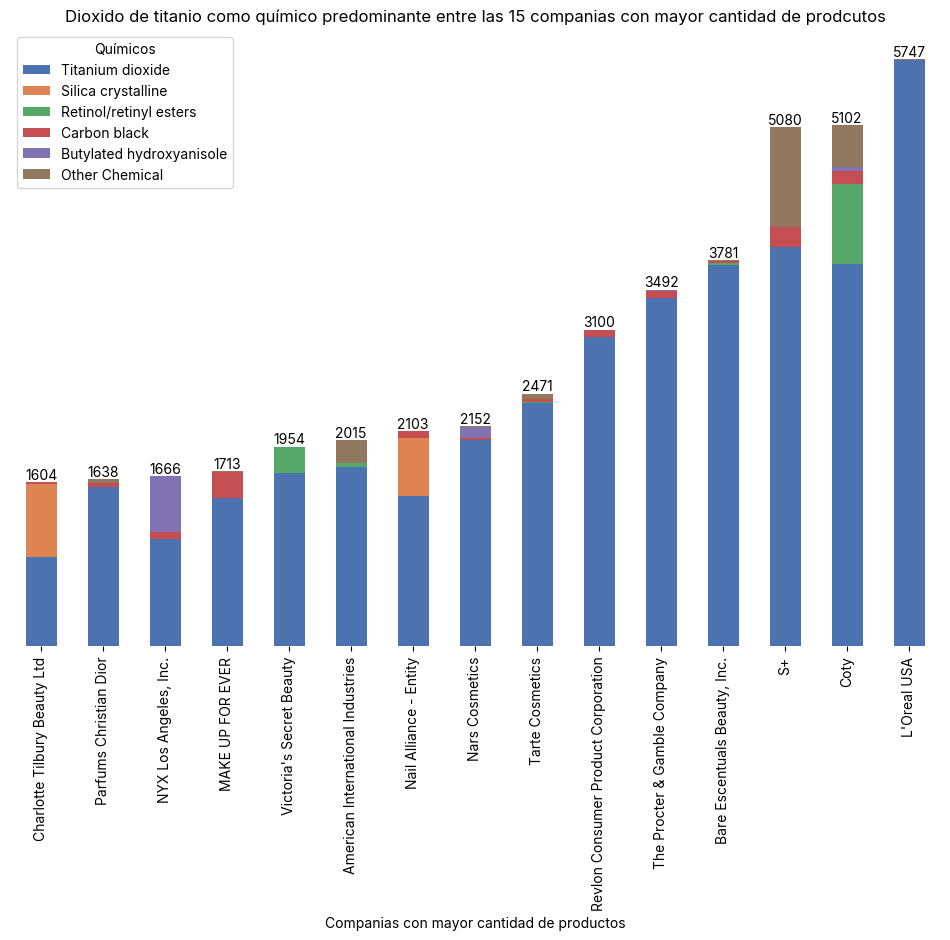

In [13]:
PriCatDescontinued = (
    df_clean.groupby("CompanyName")["ProductName"].count().sort_values().tail(15)
)

filtered_df = df_clean[df_clean["CompanyName"].isin(PriCatDescontinued.index)]

pivot_table = filtered_df.pivot_table(
    index="CompanyName", columns="ChemicalName", aggfunc="size", fill_value=0
)

top_5_chemicals = pivot_table.sum().sort_values(ascending=False).head(5).index

pivot_table["Other Chemical"] = pivot_table.drop(columns=top_5_chemicals).sum(axis=1)

pivot_table = pivot_table[top_5_chemicals.tolist() + ["Other Chemical"]].reindex(
    PriCatDescontinued.index
)
pivot_table.plot(kind="bar", stacked=True, figsize=(12, 8))

values = PriCatDescontinued.values
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha="center", va="bottom", fontsize=10)


plt.title(
    "Dioxido de titanio como químico predominante entre las 15 companias con mayor cantidad de prodcutos"
)
plt.ylabel("Cantidad de productos")
plt.xlabel("Companias con mayor cantidad de productos")
plt.gca().get_yaxis().set_visible(False)
plt.legend().set_title("Químicos")

En la grafica se pueden observar las principales companias con productos peligrosos, siendo L'Oreal la que mayor cantidad de productos peligrosos inserto en el mercado.  
Tambien se puede ver que el principal químico peligroso dentro de las principales companias en el dioxido de titanio, tal como se intuyo en el analisis exploratorio.

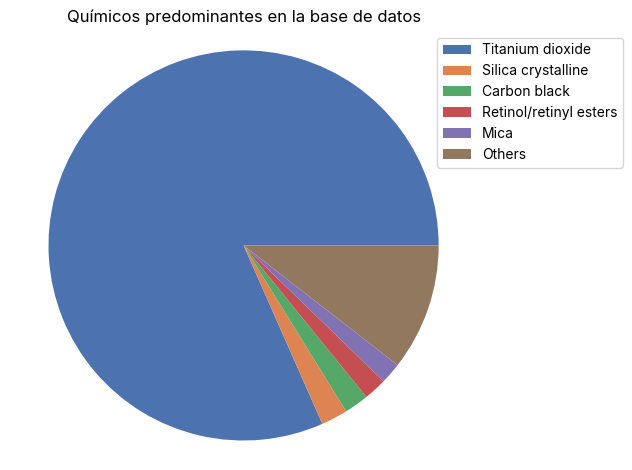

In [14]:
top_5 = (
    df_clean.groupby("ChemicalName")["ProductName"]
    .count()
    .sort_values(ascending=False)
    .iloc[:5]
)
otros = (
    df_clean.groupby("ChemicalName")["ProductName"]
    .count()
    .sort_values(ascending=False)
    .iloc[5:]
    .sum()
)
pie_DF = pd.DataFrame(top_5)
others_df = pd.DataFrame({"ProductName": [otros]}, index=["Others"])
pie_DF = pd.concat([pie_DF, others_df])
pie_DF.plot.pie(y="ProductName", labels=None)
plt.title("Químicos predominantes en la base de datos")
plt.axis("off")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular.
labels = pie_DF.index
plt.legend(labels, bbox_to_anchor=(0.9, 1))
plt.tight_layout()

Aqui se puede ver que mas del 75% de los productos de la lista contienen dioxido de titanio, seguido por la silica cristalina y el carbon negro.  
Una investigación rápida de mi parte pudo encontrar que el dioxido de titanio se usa principalmente como pigmento debido a su brillo y alto indice de refracción. Tambien se encuentra su uso en protectores solares por sus caracteristicas espesantes.

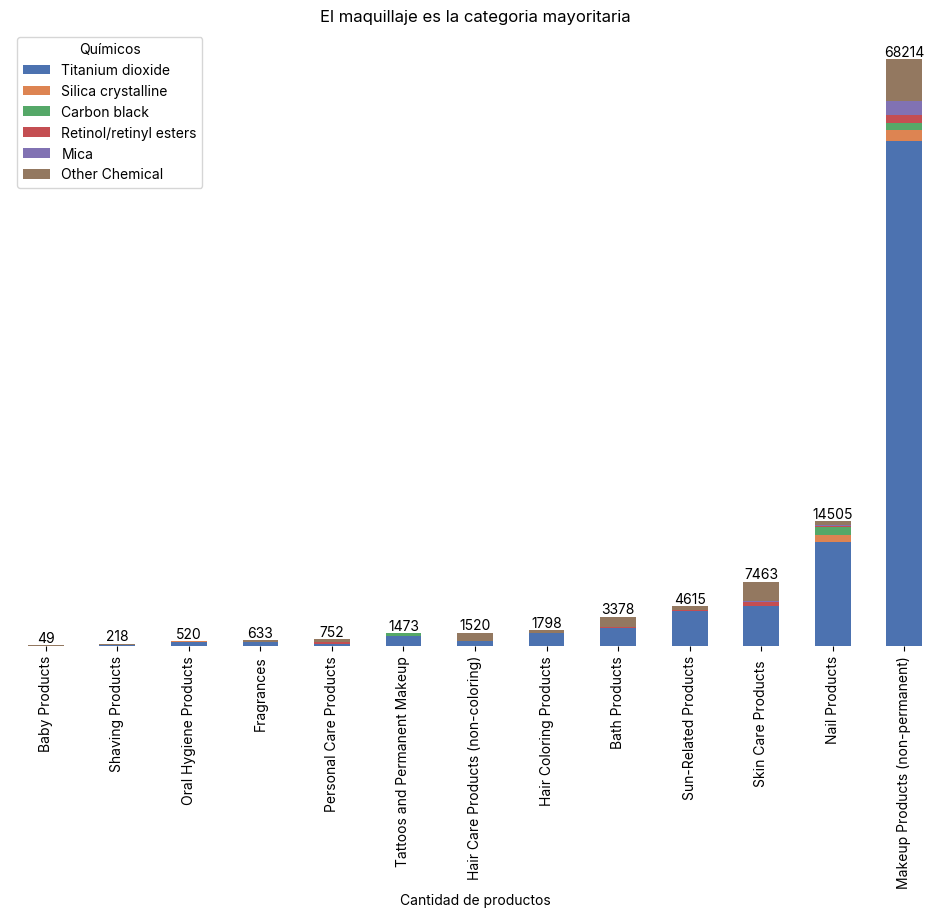

In [15]:
Productos_categoria = (
    df_clean.groupby("PrimaryCategory")["ProductName"].count().sort_values()
)


filtered_df = df_clean[df_clean["PrimaryCategory"].isin(Productos_categoria.index)]

pivot_table = filtered_df.pivot_table(
    index="PrimaryCategory", columns="ChemicalName", aggfunc="size", fill_value=0
)

top_5_chemicals = pivot_table.sum().sort_values(ascending=False).head(5).index

pivot_table["Other Chemical"] = pivot_table.drop(columns=top_5_chemicals).sum(axis=1)

pivot_table = pivot_table[top_5_chemicals.tolist() + ["Other Chemical"]].reindex(
    Productos_categoria.index
)

pivot_table.plot(kind="bar", stacked=True, figsize=(12, 8))

values = Productos_categoria.values
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha="center", va="bottom", fontsize=10)


plt.title("El maquillaje es la categoria mayoritaria")
plt.ylabel("Categoria Primaria")
plt.xlabel("Cantidad de productos")
plt.gca().get_yaxis().set_visible(False)
plt.legend().set_title("Químicos")

Los productos de maquillaje son la categoria mayoritaria. Tambien se ve una participacion mayoritaria del dioxido de titanio.  


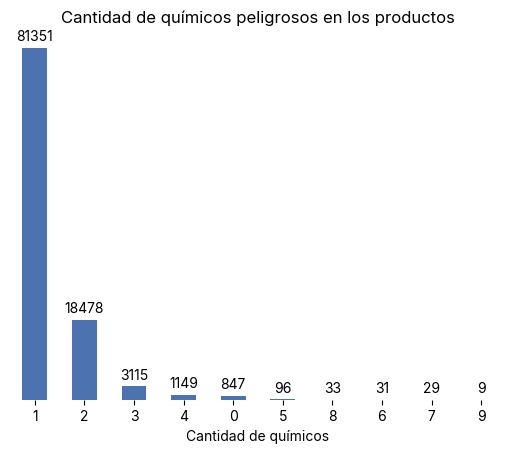

In [16]:
Chemical_counts = df_clean["ChemicalCount"].value_counts()
Chemical_counts.plot.bar()
values = Chemical_counts.values
for i, value in enumerate(values):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)
plt.title("Cantidad de químicos peligrosos en los productos")
plt.ylabel("Cantidad de productos con x cantidad de químicos")
plt.xlabel("Cantidad de químicos")
plt.gca().get_yaxis().set_visible(False)


La gran mayoria de los productos presentan solamente un químico peligroso. Pocos productos poseen mas de 3 químicos peligrosos, esto puede ser un dato positivo, ya que implicaria que no habria que hacer grandes reformulaciones para lograr prodcutos menos peligrosos.

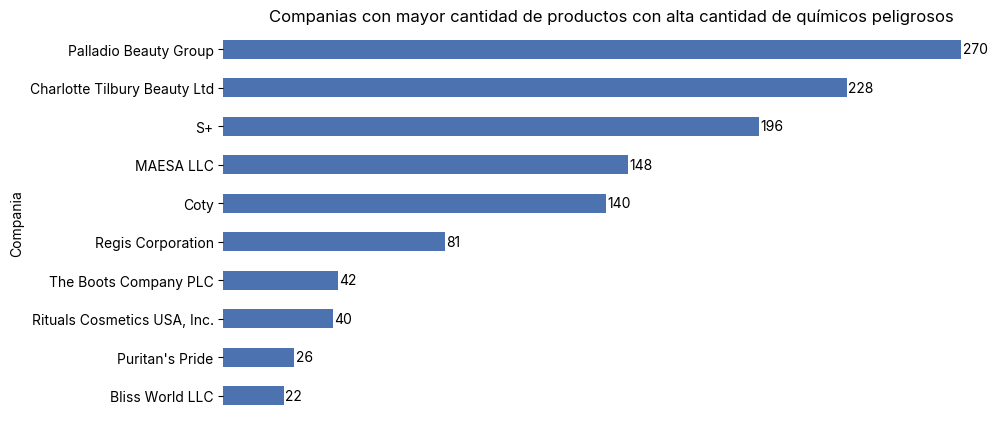

In [17]:
df_most_toxix = df_clean[df_clean["ChemicalCount"] >= 4]

df_most_toxic_plot = (
    df_most_toxix.groupby(["CompanyName"])["ProductName"].count().sort_values().tail(10)
)

df_most_toxic_plot.plot.barh(figsize=(10, 5))

values = df_most_toxic_plot.values
for i, value in enumerate(values):
    plt.text(value + 0.5, i, str(value), ha="left", va="center", fontsize=10)

plt.title(
    "Companias con mayor cantidad de productos con alta cantidad de químicos peligrosos"
)
plt.xlabel("Cantidad de productos con alta cantidad de quimicos peligrosos")
plt.ylabel("Compania")

plt.gca().get_xaxis().set_visible(False)

La compania con mayor número de productos con mas de 4 químicos peligrosos es "Palladio Beuty Group". Es notable el caso de "S+" y "Coty", ya que estas estan entre las companias con mayor cantidad de productos en el mercado.  

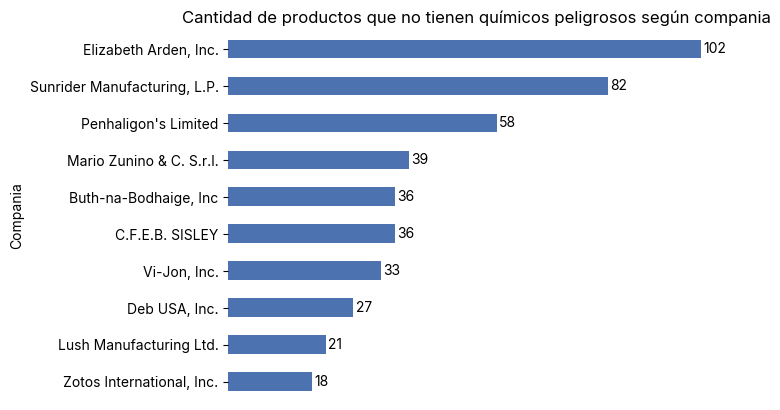

In [18]:
df_least_toxic = df_clean[df_clean["ChemicalCount"] == 0]
df_least_toxic = (
    df_least_toxic.groupby("CompanyName")["ProductName"].count().sort_values().tail(10)
)
df_least_toxic.plot.barh()
values = df_least_toxic.values
for i, value in enumerate(values):
    plt.text(value + 0.5, i, str(value), ha="left", va="center", fontsize=10)

plt.title("Cantidad de productos que no tienen químicos peligrosos según compania")
plt.xlabel("Cantidad de productos")
plt.ylabel("Compania")
plt.gca().get_xaxis().set_visible(False)

Se puede destacar que ninguna de las companias que se encuentra en esta lista participa de forma significativa en el mercado cosmetico Californiano.

## Productos descontinuados

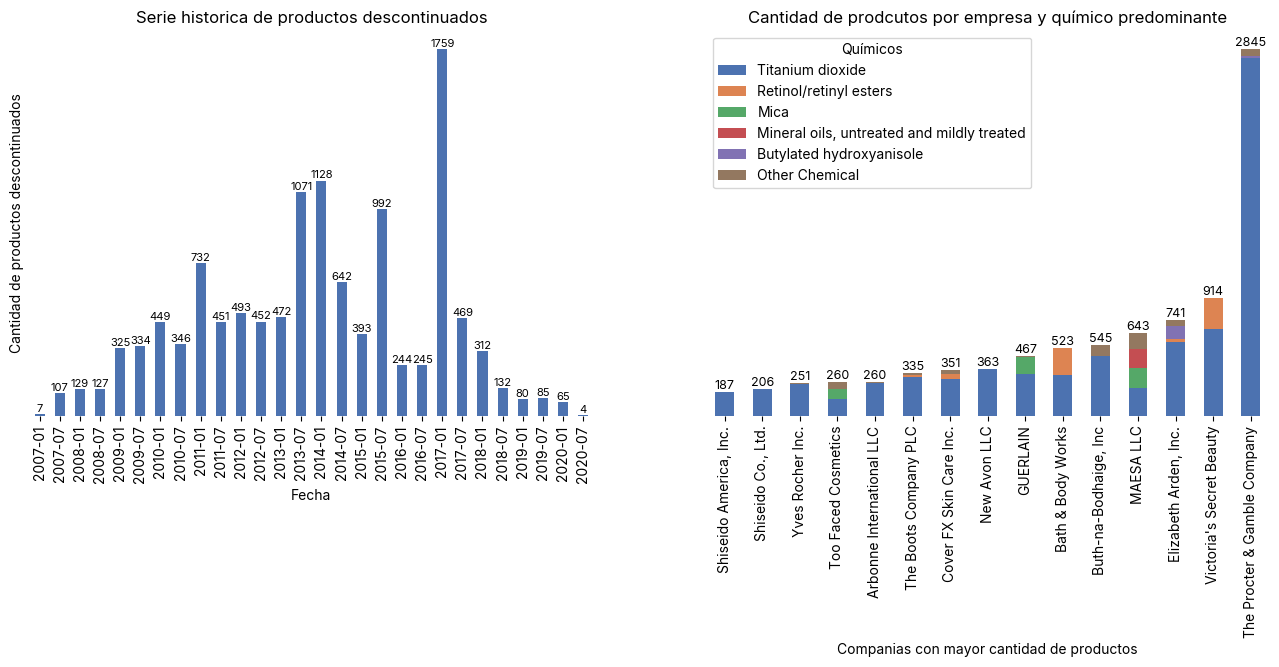

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

df_resampled = (
    df_clean.set_index(["DiscontinuedDate"])["ProductName"].resample("6ME").count()
)
df_resampled.index = df_resampled.index.strftime("%Y-%m")


df_resampled.plot(kind="bar", ax=ax[0])

values_1 = df_resampled.values

for i, value in enumerate(values_1):
    ax[0].text(i, value + 1, str(value), ha="center", va="bottom", fontsize=8)

ax[0].set_title(
    "Serie historica de productos descontinuados",
)
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Cantidad de productos descontinuados")

Descontinuated = df_clean.loc[df_clean["DiscontinuedDate"].notna()]

major_companies = (
    Descontinuated.groupby("CompanyName")["ProductName"].count().sort_values().tail(15)
)

filtered_df = Descontinuated[Descontinuated["CompanyName"].isin(major_companies.index)]

pivot_table = filtered_df.pivot_table(
    index="CompanyName", columns="ChemicalName", aggfunc="size", fill_value=0
)

top_5_chemicals = pivot_table.sum().sort_values(ascending=False).head(5).index

pivot_table["Other Chemical"] = pivot_table.drop(columns=top_5_chemicals).sum(axis=1)

pivot_table = pivot_table[top_5_chemicals.tolist() + ["Other Chemical"]].reindex(
    major_companies.index
)
values = major_companies.values
for i, value in enumerate(values):
    ax[1].text(i, value + 1, str(value), ha="center", va="bottom", fontsize=9)

pivot_table.plot(kind="bar", stacked=True, ax=ax[1])

ax[1].set_title("Cantidad de prodcutos por empresa y químico predominante")
ax[1].set_ylabel("Cantidad de productos descontinuados")
ax[1].set_xlabel("Companias con mayor cantidad de productos")

ax[1].set_yticks([])
ax[0].set_yticks([])
ax[1].get_yaxis().set_visible(False)
ax[1].legend().set_title("Químicos")

Haciendo un enfoque en los productos descontinuados se observa que P&G fue la compania que mas productos ha descontinuado, esta junto con Victoria secret son las unicas empresas que estan en el top 10 de las que mayor participacion en el mercado tienen.  
Tambien se observa que la distribucion de los químicos en los productos sigue la misma tendencia que los productos que sigen en el mercado.  
Por ultimo se puede destacar la compania "Elizabeth Arden, Inc" que ademas de ser una de las empresas con menos químicos peligrosos en sus productos, es ademas una de las que mas productos retira del mercado.  

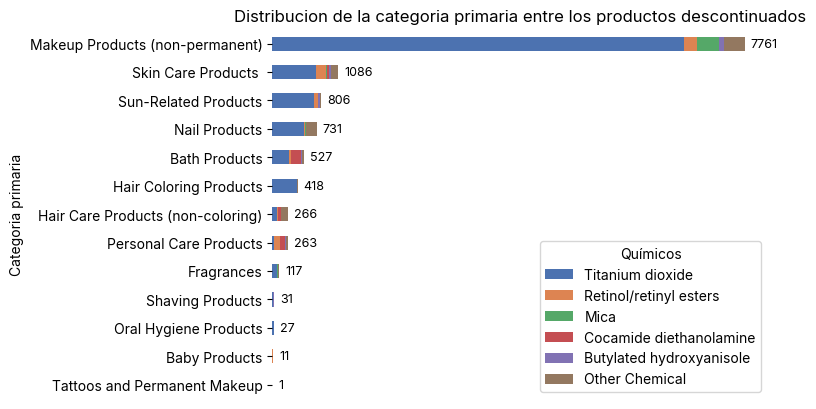

In [20]:
PriCatDescontinued = (
    Descontinuated.groupby("PrimaryCategory")["ProductName"]
    .count()
    .sort_values()
    .tail(15)
)

filtered_df = Descontinuated[
    Descontinuated["PrimaryCategory"].isin(PriCatDescontinued.index)
]

pivot_table = filtered_df.pivot_table(
    index="PrimaryCategory", columns="ChemicalName", aggfunc="size", fill_value=0
)

top_5_chemicals = pivot_table.sum().sort_values(ascending=False).head(5).index

pivot_table["Other Chemical"] = pivot_table.drop(columns=top_5_chemicals).sum(axis=1)

pivot_table = pivot_table[top_5_chemicals.tolist() + ["Other Chemical"]].reindex(
    PriCatDescontinued.index
)

pivot_table.plot(kind="barh", stacked=True)

values = PriCatDescontinued.values
for i, value in enumerate(values):
    plt.text(value + 100, i, str(value), ha="left", va="center", fontsize=9)

plt.legend().set_title("Químicos")

plt.title("Distribucion de la categoria primaria entre los productos descontinuados")
plt.xlabel("Cantidad de productos descontinuados")
plt.ylabel("Categoria primaria")
plt.gca().get_xaxis().set_visible(False)

La distribucion segun categoría tambien sigue la misma tendencia que la base de datos.

# Desarrollo del modelo
### Modulos a importar de las librerias de ML

EL modelo a plantear sera uno de clasificacion de productos descontinuados por medio de un aprendizaje supervisado. Esto puede servir para intentar predecir que productos tienen altas chances de ser discontinuados.  
El modelo esta pensado para ser utilizado por las empresas de manufactura de cosmeticos, los organismos reguladores y usuarios entusiastas. 

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.compose import ColumnTransformer

In [22]:
condition_created = df_clean["InitialDateReported"] < df_clean["ChemicalCreatedAt"]
condition_equal = df_clean["InitialDateReported"] == df_clean["ChemicalCreatedAt"]
df_clean[condition_equal]

df_ML_raw = df_clean[condition_equal].drop(
    columns=["ChemicalDateRemoved", "ChemicalCreatedAt"]
)
df_ML_raw["Descontinuado"] = np.where(df_ML_raw["DiscontinuedDate"].notna(), 1, 0)
df_ML_raw.drop(columns=["DiscontinuedDate"], inplace=True)

In [23]:
for date in df_ML_raw.select_dtypes("datetime64").columns:
    df_ML_raw[date + "_Year"] = df_ML_raw[date].dt.year
    df_ML_raw[date + "_Month"] = df_ML_raw[date].dt.month

cols_to_drop = [
    col for col in df_ML_raw.columns if df_ML_raw[col].dtype == "datetime64[ns]"
]
df_ML_raw = df_ML_raw.drop(columns=cols_to_drop)

Se convierten las columnas con datos de fecha en un valor numerico tanto para el año como para el mes.  
Tambien se opto por crear una columna Descontinuado para poder identificar los productos que fueron descontinuados.  

In [24]:
# Eliminar valores nulos
df_ML = df_ML_raw.dropna()

# Separo categorias numericas de strings
object_cols = df_ML.select_dtypes(include="object").columns

# Saco la el target de las categorias númericas desde ahora asi no jode
numeric_cols = (
    df_ML.select_dtypes(exclude="object").drop(columns="Descontinuado").columns
)

# defino una secuencia de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("encoding", OneHotEncoder(sparse_output=True), object_cols),
        (
            "numerical",
            "passthrough",
            numeric_cols,
        ),
    ],
)

# Defino que tipo de selector de features voy a usar
feature_selector = SelectKBest(chi2, k="all")  # Adjust k as needed

# Creo un pipeline para que funcione mas rápido
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("feature_selection", feature_selector)]
)

# Separo el target
y = df_ML["Descontinuado"]

# aplico la transformacion y la seleccion de features
pipeline.fit(df_ML, y)

# Obtengo la sparse matrix de features
X_combined_selected = pipeline.transform(df_ML)

p_values = feature_selector.pvalues_
p_value_threshold = 0.05

# Creo una condicion para eliminar features
selected_features_mask = p_values < p_value_threshold

# Aplico la condicion en la sparse matrix
X_combined_selected = X_combined_selected[:, selected_features_mask]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined_selected, y, test_size=0.2, random_state=42
)

Aqui se opto por el encoding tipo OneHotEncoder, ya que esto preserva la jerarquia de las variables categoricas nominales y no crea preferencias según el orden de aparición. Con el contrapunto de hacer un computo mucho mayor que con otro metodo de encoding como LabelEncoder. Para mitigar las exigencias computacionales se eligio usar sparse matrix en todo el proceso.    
Para la seleccion de las features relevantes se realizó un test de hipótesis en el cual se eligio la distribucion chi-squared con un valor critico de 0.05. Esto se debe que las variables de input y las variables output son categoricas. Se uso el target value "Descontinuado".  
Una de las razones para usar un metodo estadistico tradicional en vez de los modelos mas sofisticados como PCA o eleccion usando un modelo ML es la poca exigencia computacional necesaria, siendo en este caso por el tamaño de los datos un factor clave.   
Por ultimo se separaron los set de datos de entrenamiento y testeo para evitar un overfitting del modelo.

In [25]:
svc_pipeline = Pipeline(
    [
        ("scaling", MaxAbsScaler()),
        ("SVC", LinearSVC()),
    ]
)

param_grid = {
    "SVC__C": np.logspace(-3, 3, 10),
}

grid = GridSearchCV(svc_pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', MaxAbsScaler()),
                                       ('SVC', LinearSVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

Para este tipo de problema se eligió el modelo SVM lineal para la clasificacion. Debido al tamaño del dataset opté por un metodo lineal, estos son los que menos tiempo de entrenamiento necesitan para dar resultados precisos. Previo a su implementacion aplique un MaxAbsScaler para mejorar la performance del algoritmo evitando el sesgo de las variables. El uso de escalado es recomendado en la bibiliografia para los modelos lineales y el SVM.  
La eleccion de esta metodo de escalado esta justificada en que es el metodo mas apropiado para una sparse matrix ya que le permite mantener su sparcity.  
Además para un mejor rendimiento del modelo se planteo una busqueda de los parametros optimos mediante una gridsearch, el unico parametro a optimizar fue el C o parametro de regulación, ya que el gamma no se aplica para los casos de SVM lineales.  

In [26]:
print(f"El C optimizado es: {grid.best_params_["SVC__C"]}")
y_pred_SVC = grid.best_estimator_.predict(X_test)


El C optimizado es: 2.154434690031882


Una vez obtenido el parametro mas optimo para el modelo se procede a medir su precision con el conjunto de datos de testeo

La presición media del algoritmo usando los parametros optimizados fue: 0.99


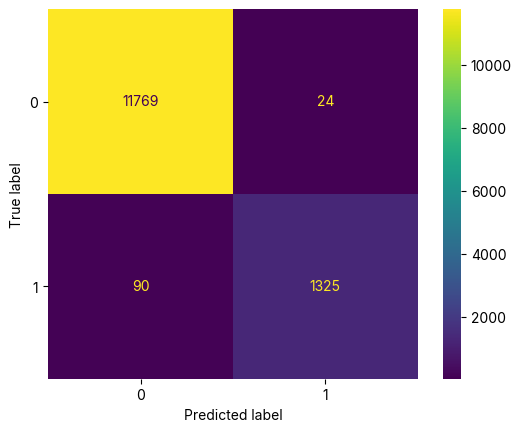

In [27]:
print(f"La presición media del algoritmo usando los parametros optimizados fue: {grid.best_score_:.2f}")
svc_cm = confusion_matrix(y_test, y_pred_SVC)
disp = ConfusionMatrixDisplay(
    confusion_matrix=svc_cm, display_labels=grid.best_estimator_.classes_
)
disp.plot()

Para evaluar la performance del modelo se utilizo la matriz de confusión, la cual es el método estandar para la evaluacion de metricas par los modelos de clasificación. Además se le agrego el uso de la presición media el cual fue calculado con el metodo score de la clase LinearSVC.   
Se observa una buena performance del modelo con mas de 90% de las clasificaciones hechas de la forma correcta.  
Los errores presentes en el modelo pueden deberse a la falta de complejidad de mismo. Un algoritmo mas adecuado para este set de datos seria un RandomForest, GradientBoostedClasiffier o incluso un SVM no lineal. Los cuales son computacionalmente mucho mas intensivos.   
En mi opinion personal este modelo de ML puede mejorarse con la inclusion de otra variable númerica que indique de algun modo la cantidad del químico peligroso que tiene el producto. Esto seria una gran mejora ya que el modelo actual solo puede predecir en base a la cantidad de químicos que posee un producto.  